    calendar_dt                       id_employee  useful_calls_fact  \
62   2025-01-04  5181d0898e67dc591593ce87ba2bedc0                  0   
69   2024-09-30  b3cc43e687b2c3051e71b1f3228929ff              20442   
90   2024-09-03  61394ec7fe3714c70ebc4104a6b17885              27499   
101  2024-12-26  07c154e0332554d9beee3be5a91da943                  0   
126  2024-09-03  4d57de0823dc982492ad59bb2e6c9aaf                  0   

     useful_chats_fact  avail_calls_fact  avail_chats_fact  \
62               18874                 0              8874   
69                   0              7087                 0   
90                   0                62                 0   
101              18073                 0              2641   
126              14537                 0                 5   

     avail_chat_call_fact  break_fact  education_fact  additional_fact  ...  \
62                      0        4753               0                0  ...   
69                      0        479

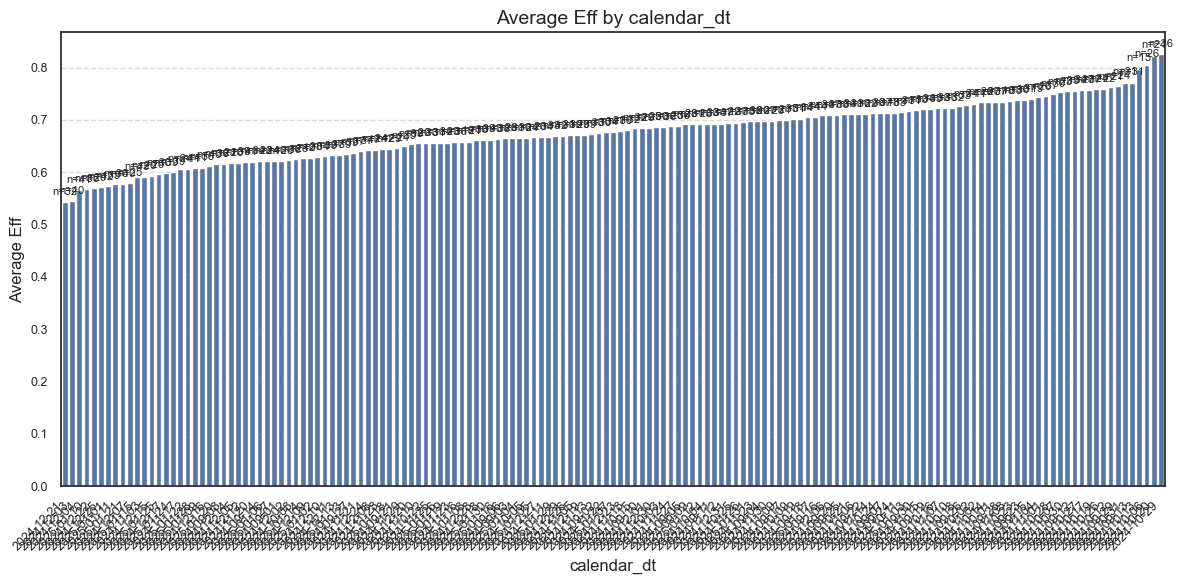

Analyzing: id_employee


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


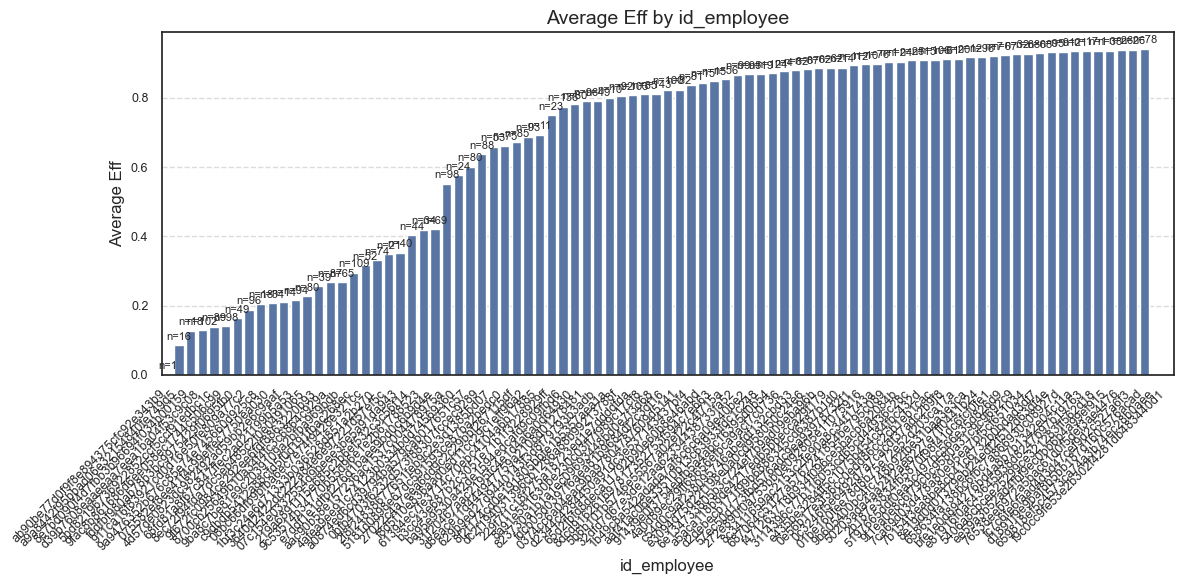

Analyzing: useful_calls_fact
Analyzing: useful_chats_fact
Analyzing: avail_calls_fact
Analyzing: avail_chats_fact
Analyzing: avail_chat_call_fact
Analyzing: break_fact
Analyzing: education_fact
Analyzing: additional_fact
Analyzing: all_system_fact
Analyzing: work_activity_plan


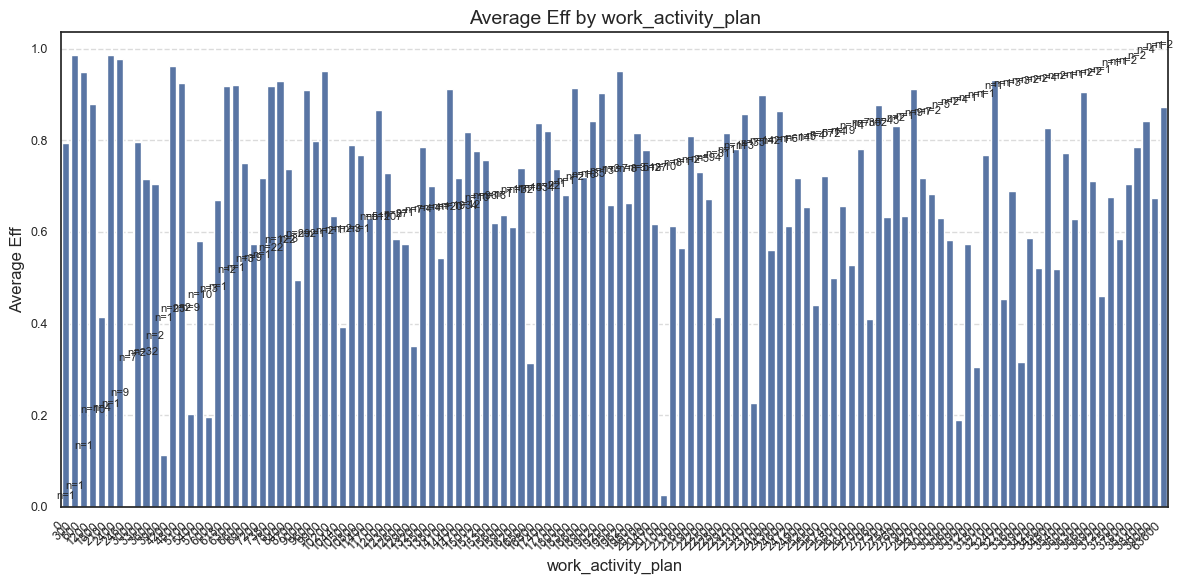

Analyzing: break_plan


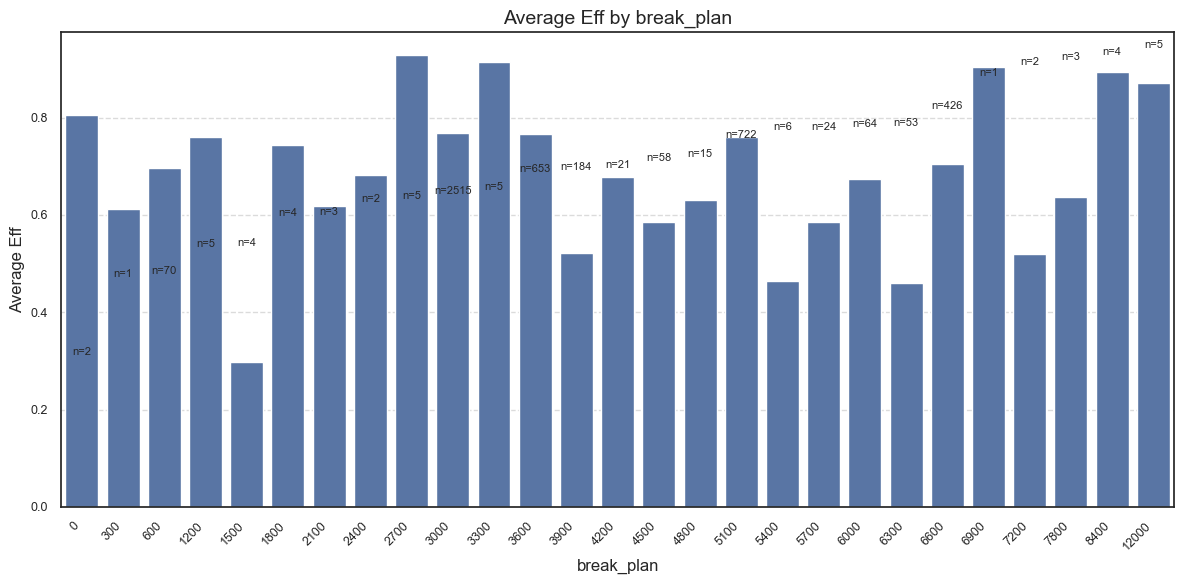

Analyzing: education_plan


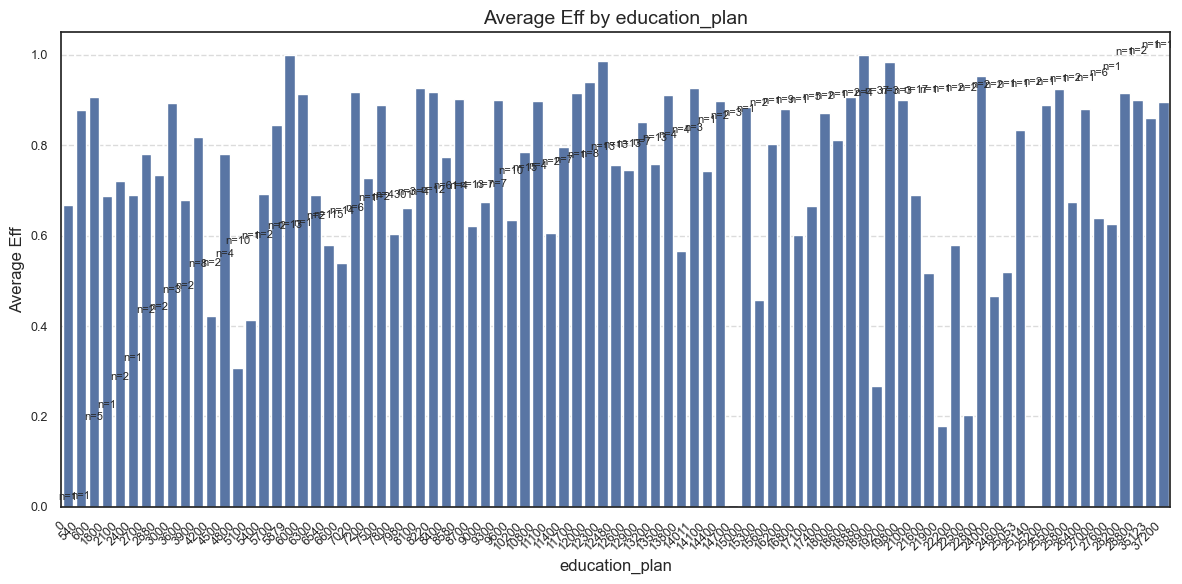

Analyzing: additional_plan


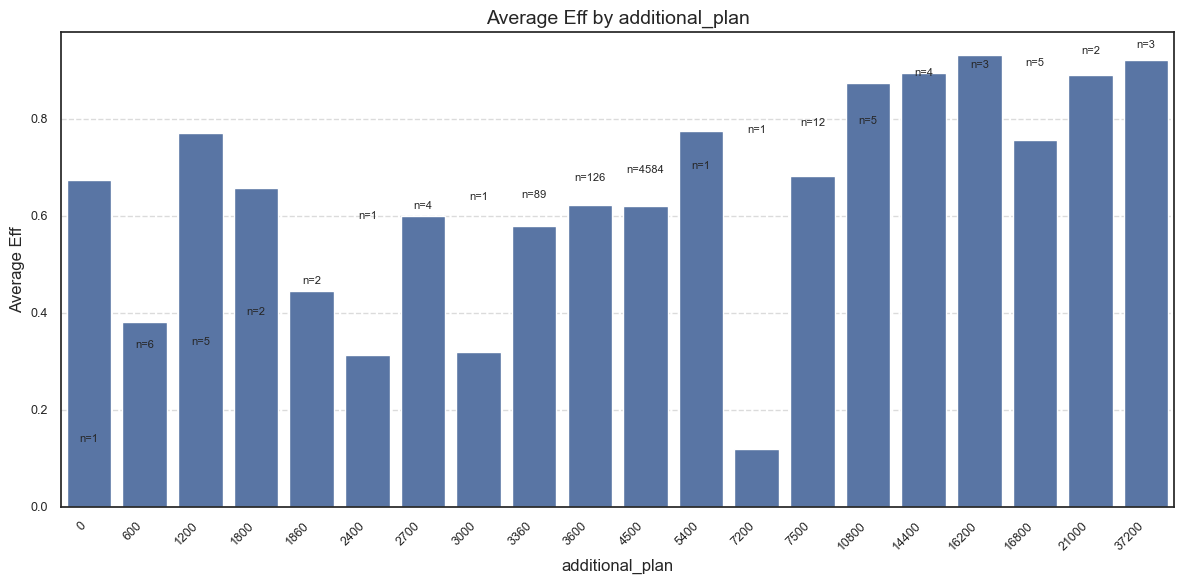

Analyzing: all_smena_plan


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


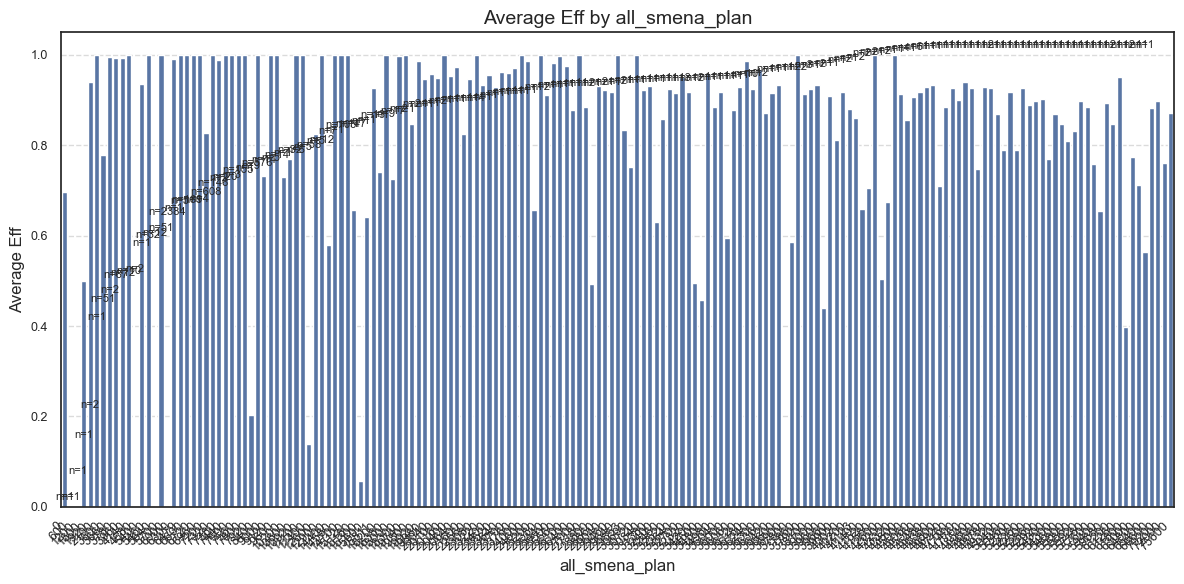

Analyzing: business_line


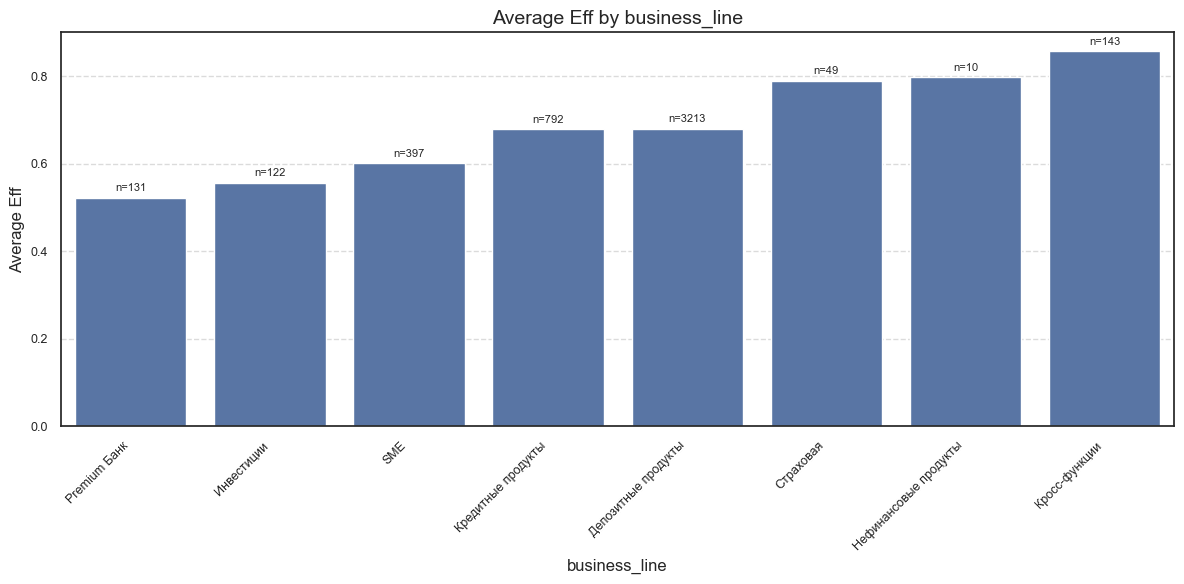

Analyzing: napravlenie


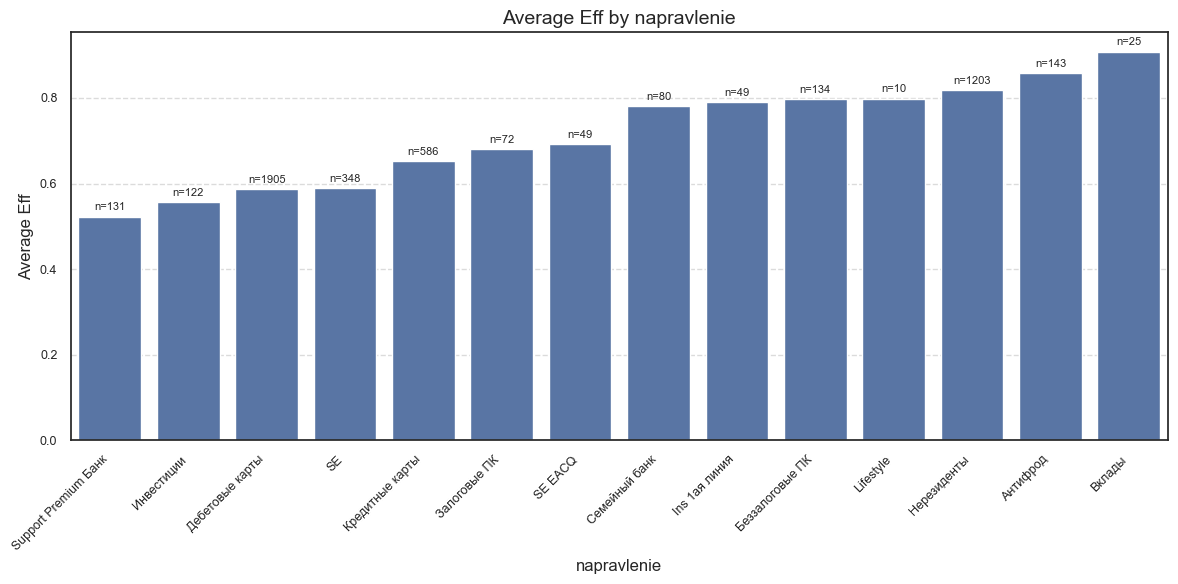

Analyzing: grid_group


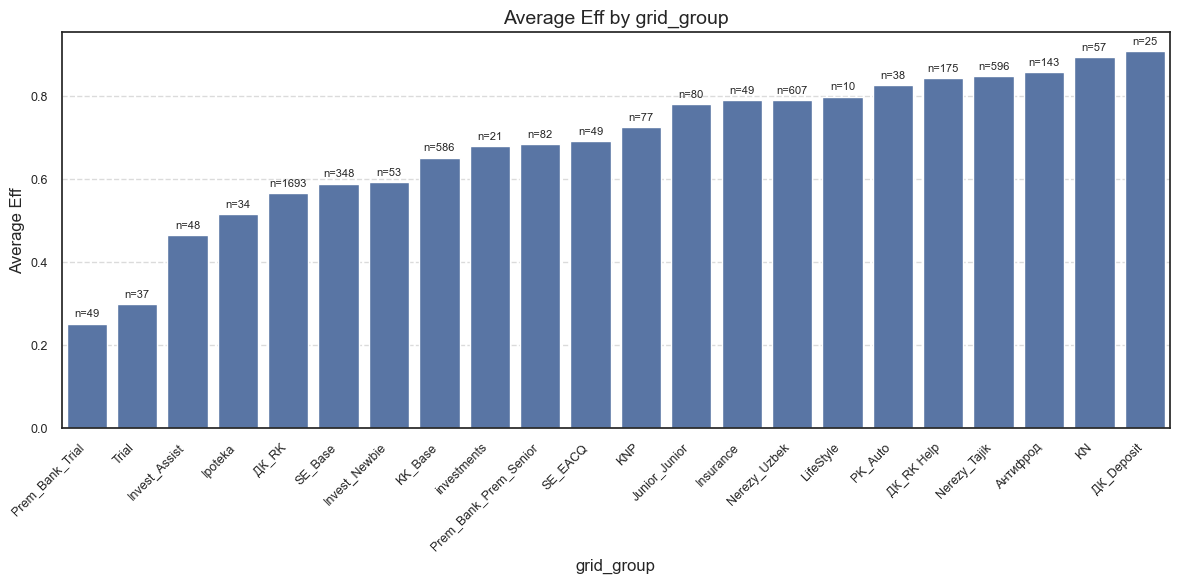

Analyzing: skill_group


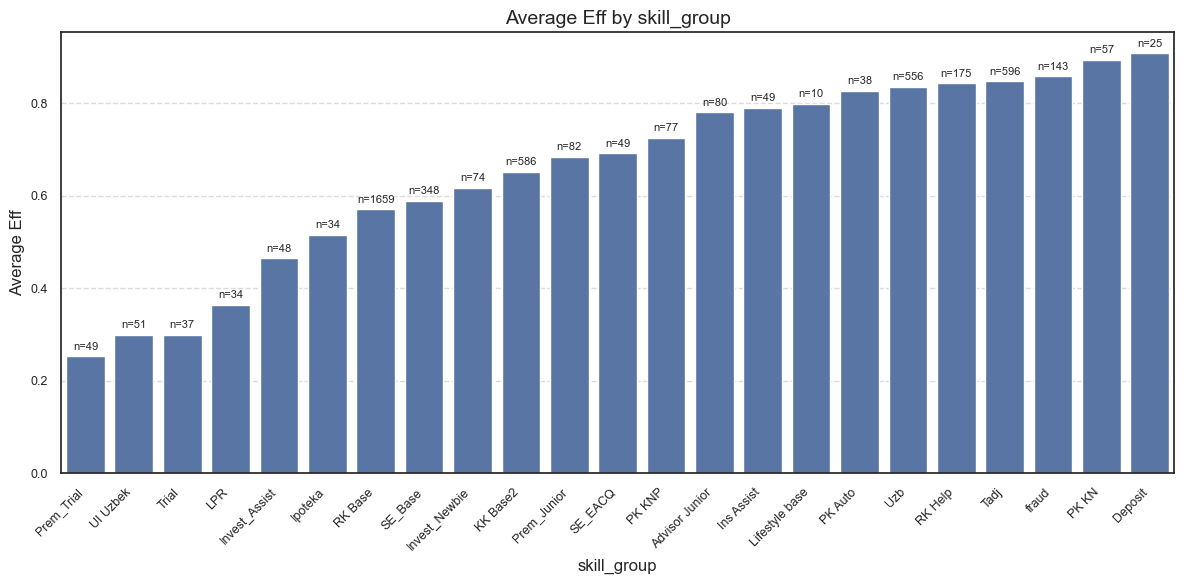

Analyzing: emp_type


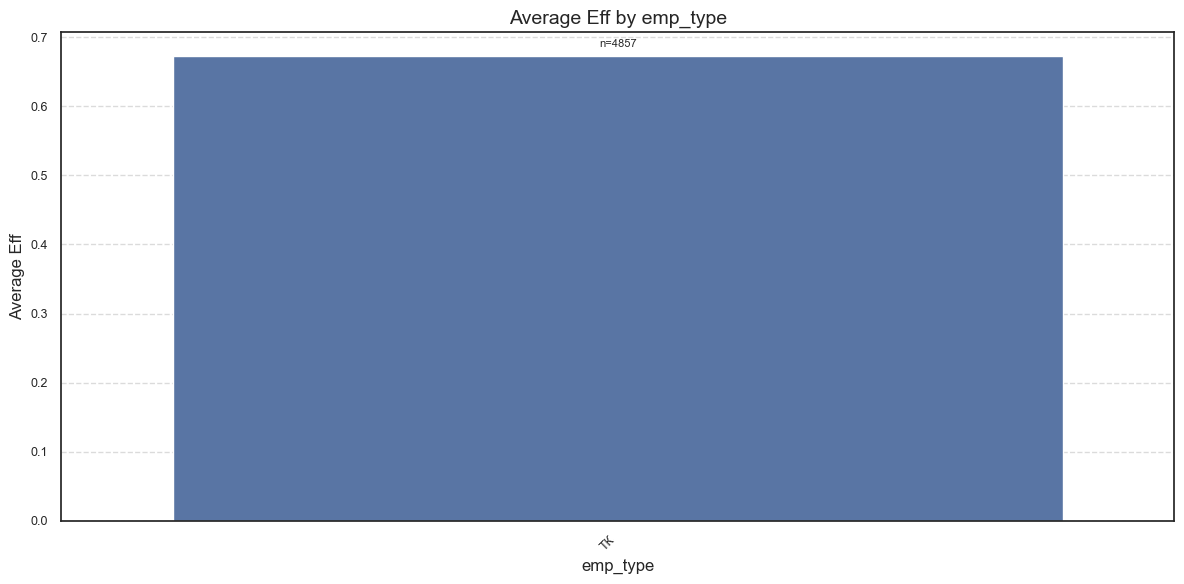

Analyzing: hire_dt


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


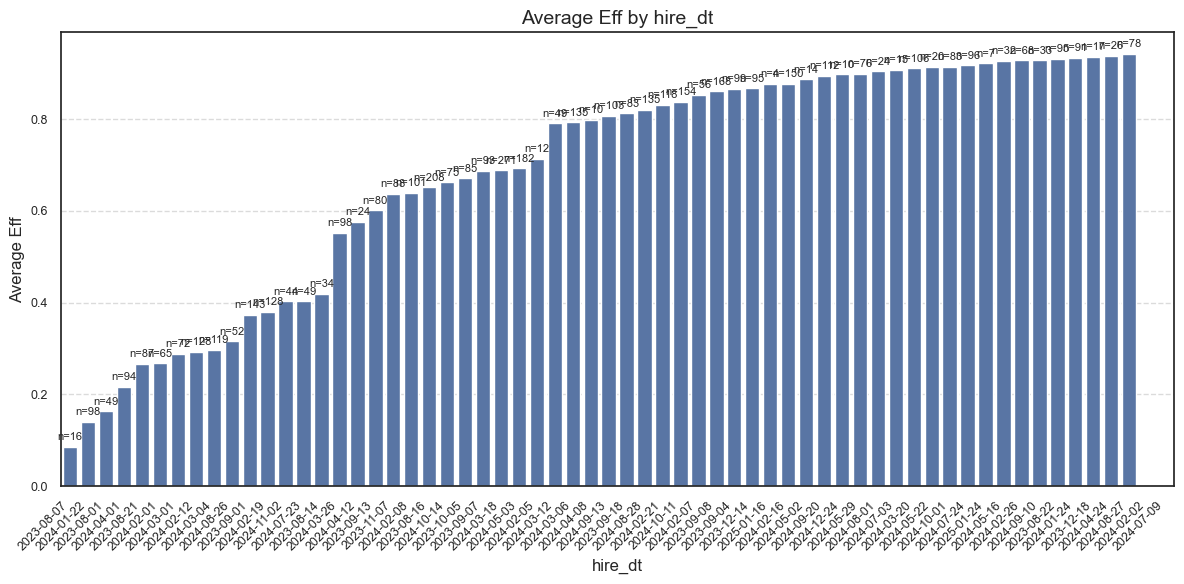

Analyzing: exp_staff


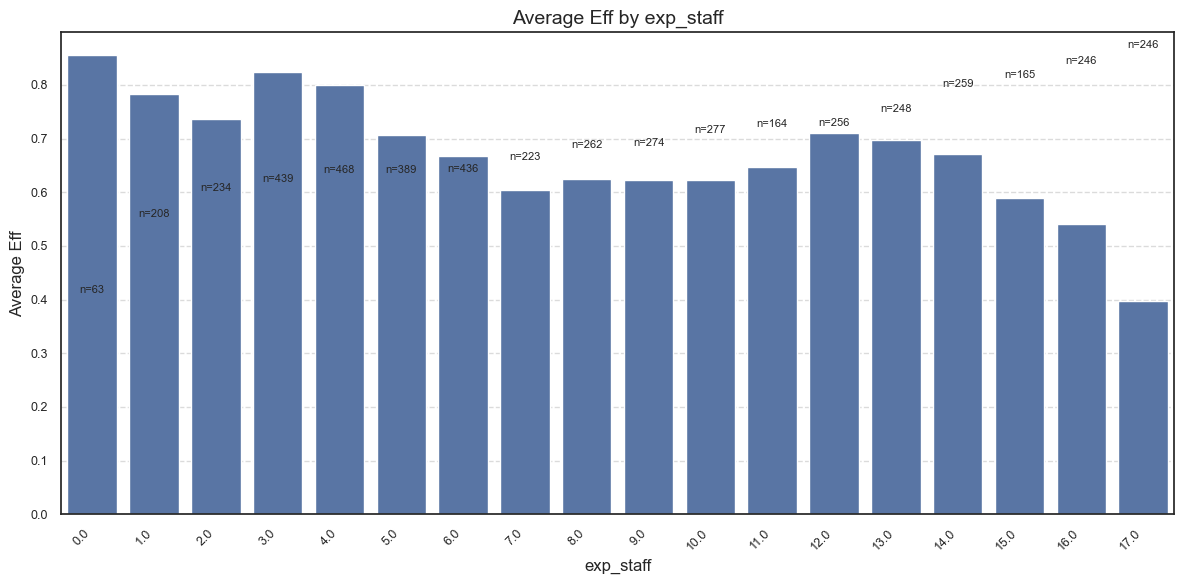

Analyzing: gender_desc


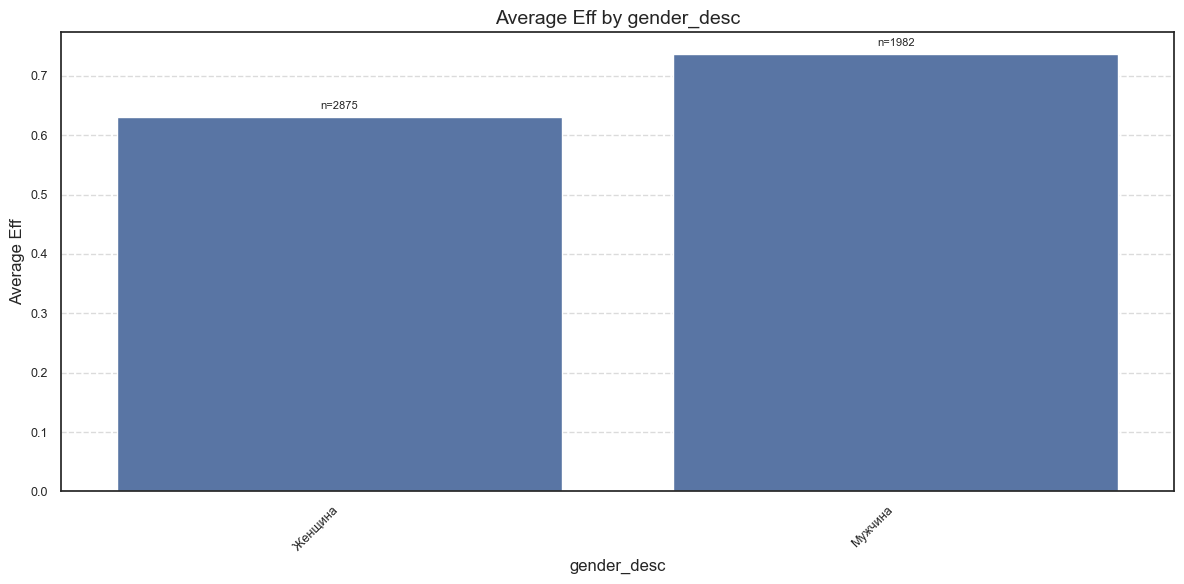

Analyzing: skill_group_exp


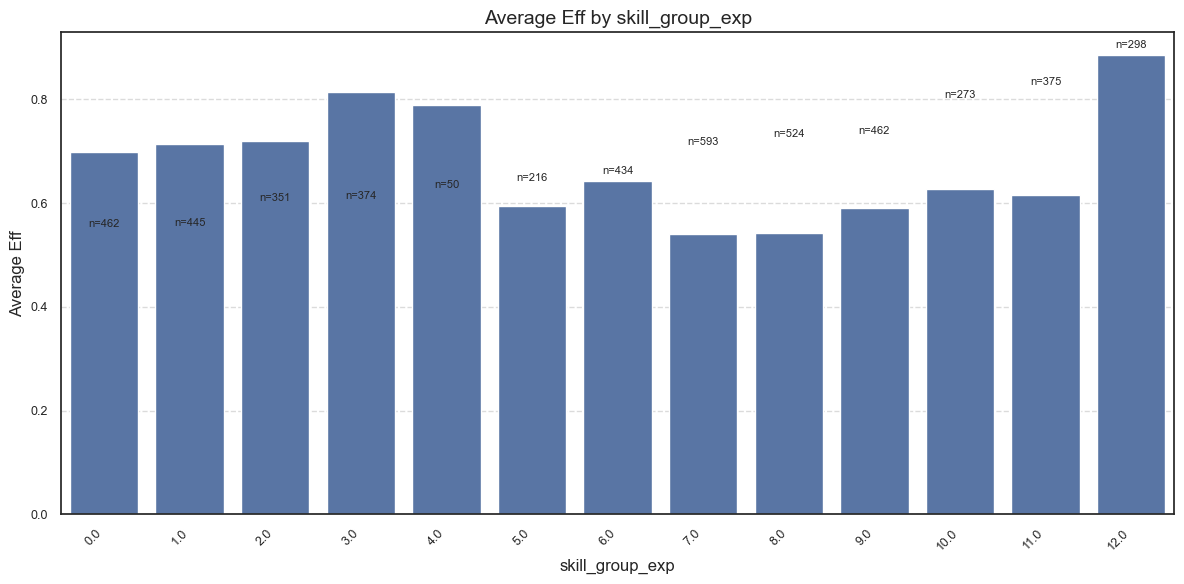

Analyzing: planning_group_nm


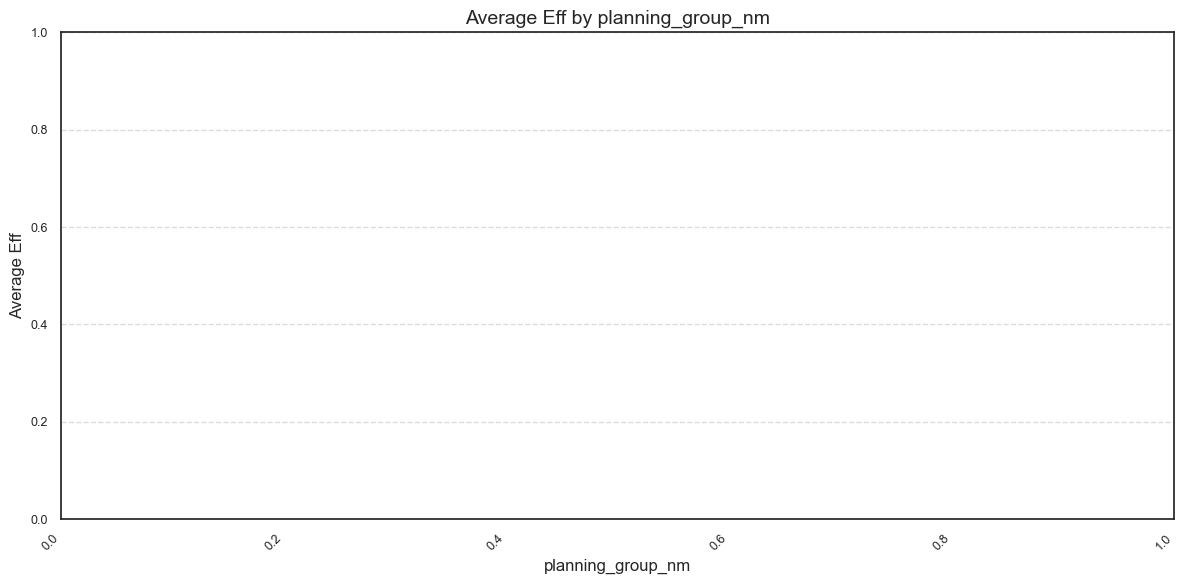

Analyzing: residential_district_nm


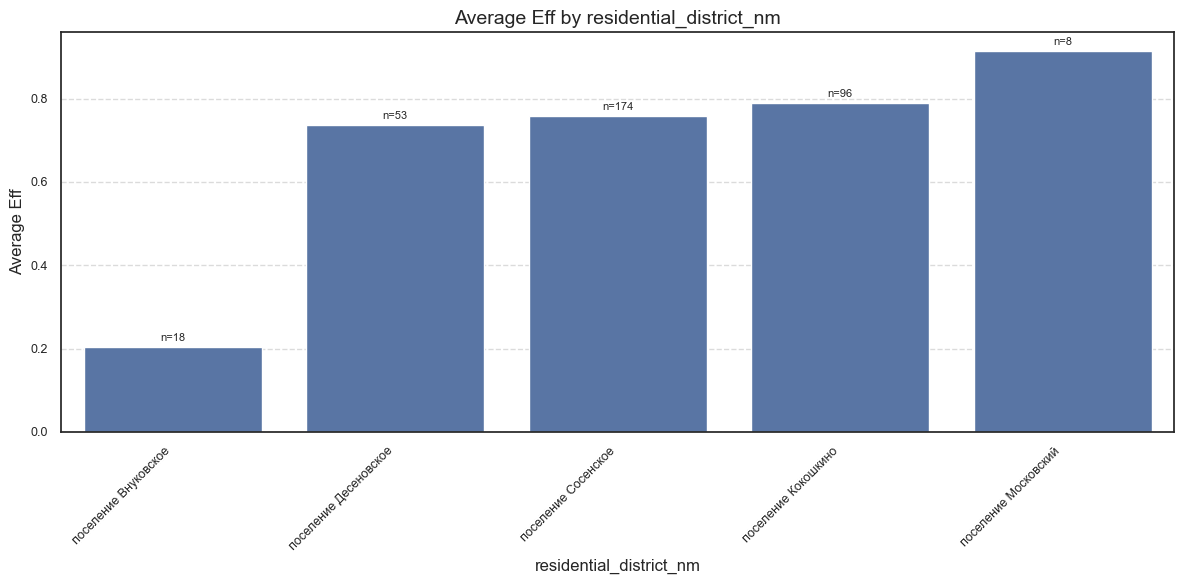

Analyzing: residential_city_nm


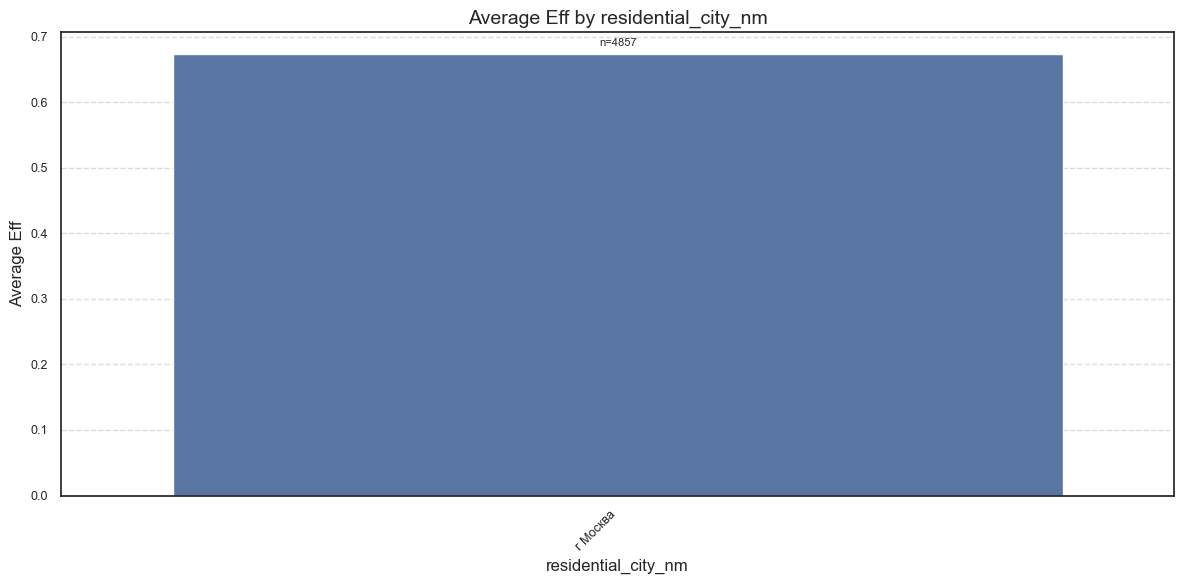

Analyzing: residential_state_nm


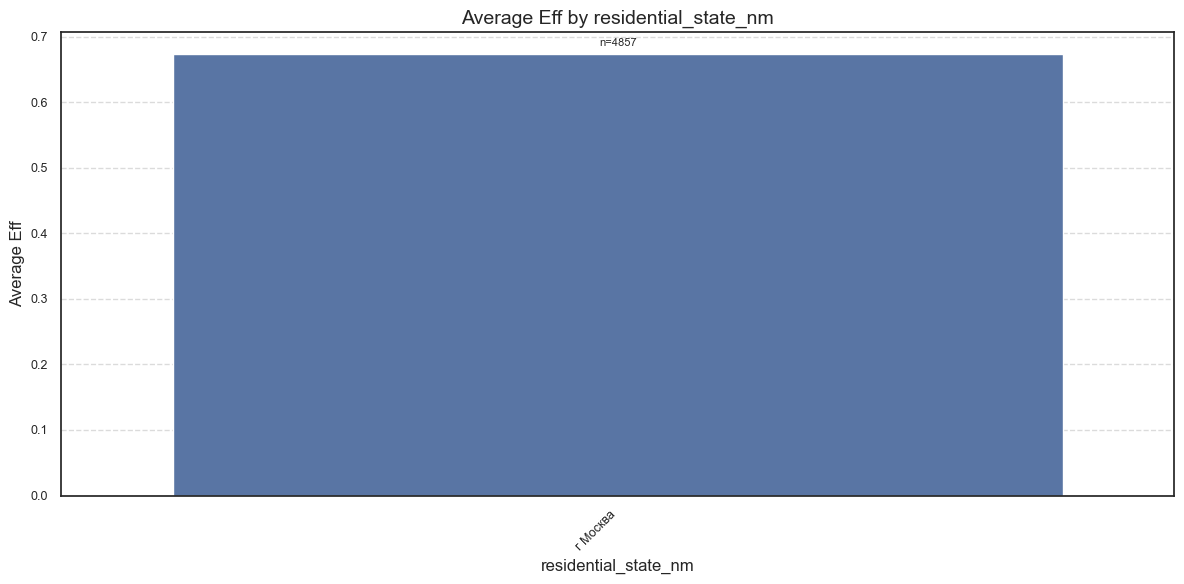

Analyzing: residential_settlement_nm


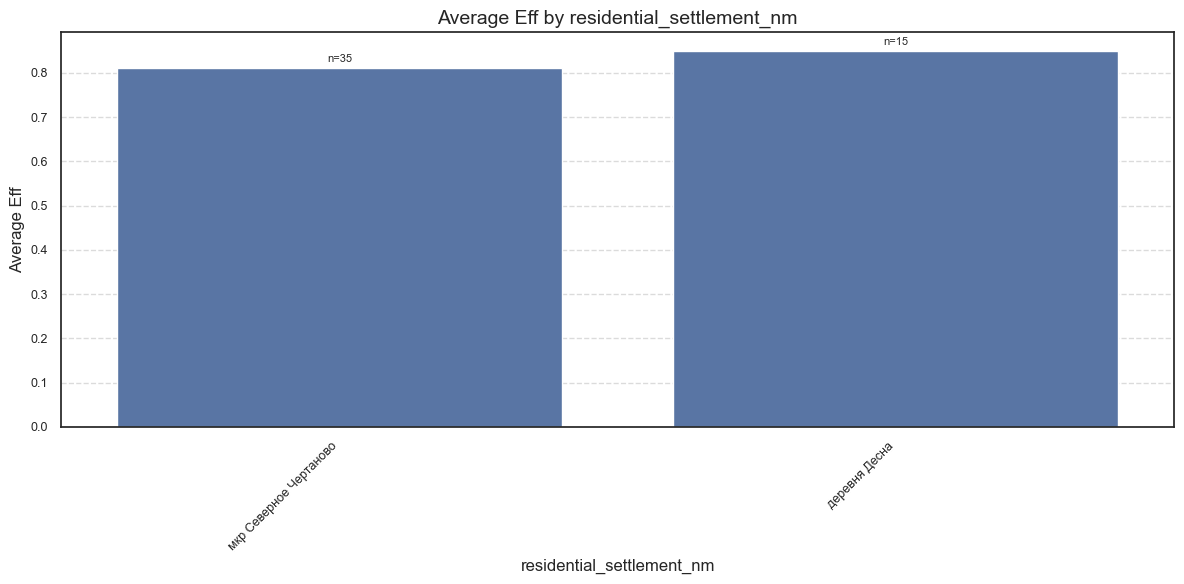

Analyzing: grafik


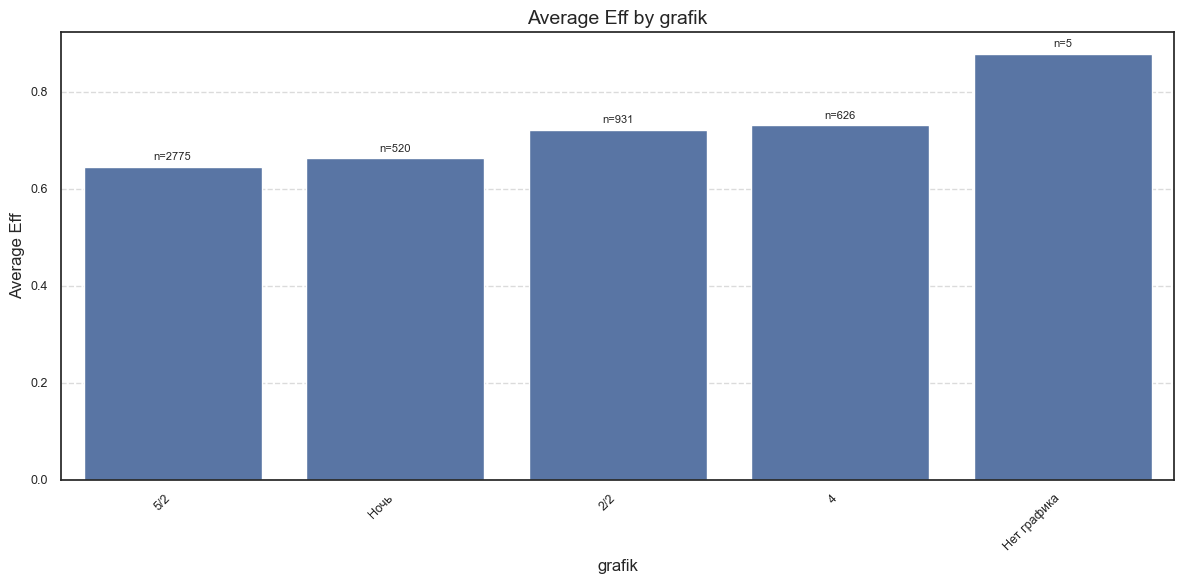

Analyzing: cnt_call


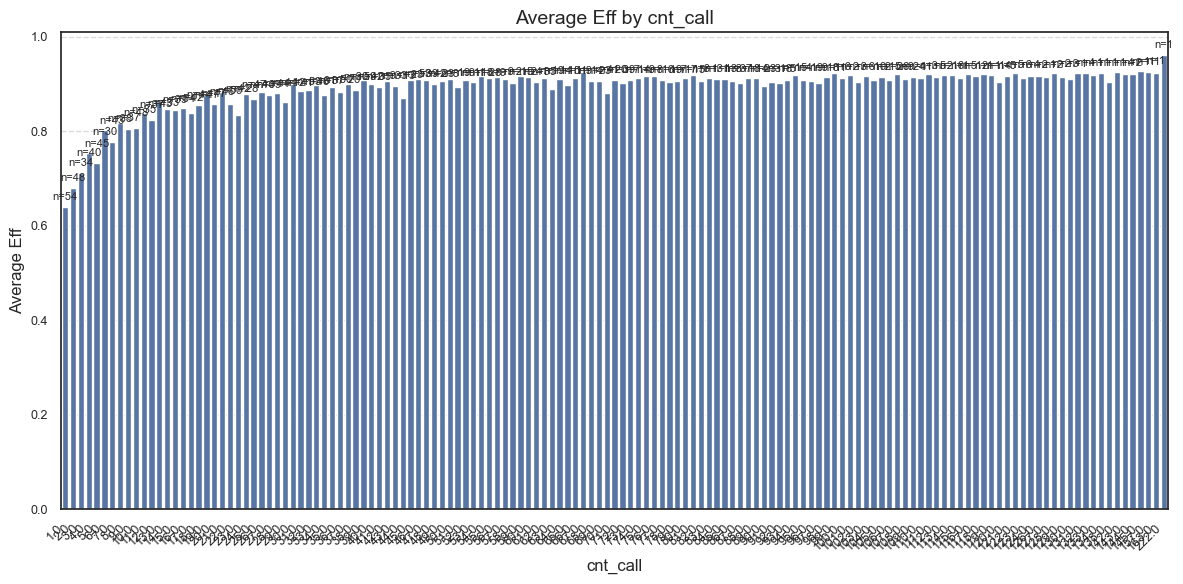

Analyzing: dlg_time_call
Analyzing: cnt_chat
Analyzing: dlg_time_chat
Analyzing: Продуктивность
Analyzing: average_work_time


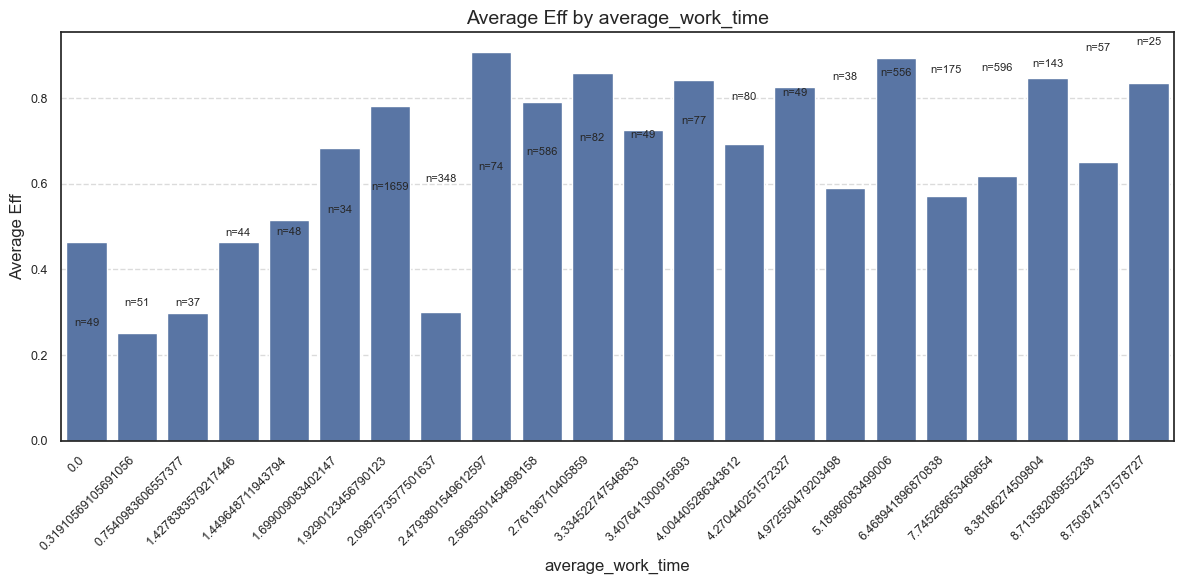

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Загрузка датасета
data = pd.read_excel('data.xlsx')

# Предположим, что у вас есть столбцы 'полезная_работа' и 'затраченная_энергия'
data['Эффективность'] = (data['useful_calls_fact'] + data['useful_calls_fact'] +  data['avail_calls_fact'] + data['avail_chats_fact'] + data['avail_chat_call_fact'] + data['education_fact'])/(data['useful_calls_fact'] + data['useful_calls_fact'] +  data['avail_calls_fact'] + data['avail_chats_fact'] + data['avail_chat_call_fact'] + data['education_fact'] + data['break_fact'] + data['additional_fact'])

data['Продуктивность'] = (data['cnt_call'] + data['cnt_chat'])/(data['dlg_time_call'] + data['dlg_time_chat'])

average_work_time = data.groupby('skill_group')['skill_group_exp'].mean().rename('average_work_time')

data = data[(data['emp_type'] == 'ТК') & (data['residential_city_nm'] == 'г Москва')]
# Добавляем новый столбец в исходный DataFrame
data = data.join(average_work_time, on='skill_group')

print(data.head())

def plot_eff_by_parameter(parameter_column):
    """
    Plot average productivity grouped by values of the given parameter column.
    
    Args:
        parameter_column: The column name to group by
    """
    # Skip if the parameter is 'prod' itself or if it's not a categorical column
    if parameter_column == 'Эффективность' or data[parameter_column].nunique() > 200:
        return
    
    # Group by the parameter and calculate mean productivity
    grouped_data = data.groupby(parameter_column)['Эффективность'].agg(['mean', 'count']).reset_index()
    
    # Sort by mean productivity for better visualization
    grouped_data = grouped_data.sort_values('mean')
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Create bar plot
    ax = sns.barplot(x=parameter_column, y='mean', data=grouped_data)
    
    # Add count annotations
    for i, row in enumerate(grouped_data.itertuples()):
        ax.text(i, row.mean + 0.01, f"n={row.count}", ha='center', va='bottom', fontsize=8)
    
    # Add labels and title
    plt.title(f'Average Eff by {parameter_column}', fontsize=14)
    plt.xlabel(parameter_column, fontsize=12)
    plt.ylabel('Average Eff', fontsize=12)
    
    # Rotate x-axis labels if needed
    plt.xticks(fontsize=9, rotation=45, ha='right')
    plt.yticks(fontsize=9)
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Loop through all columns and create plots
for column in data.columns:
    if column != 'Эффективность':  # Skip the productivity column itself
        try:
            print(f"Analyzing: {column}")
            plot_eff_by_parameter(column)
        except Exception as e:
            print(f"Error plotting {column}: {e}")


<Axes: xlabel='Эффективность', ylabel='Продуктивность'>

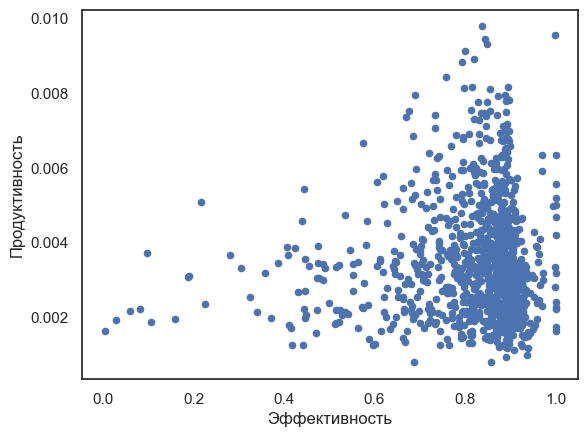

In [19]:
data.plot.scatter(x='Эффективность', y='Продуктивность')

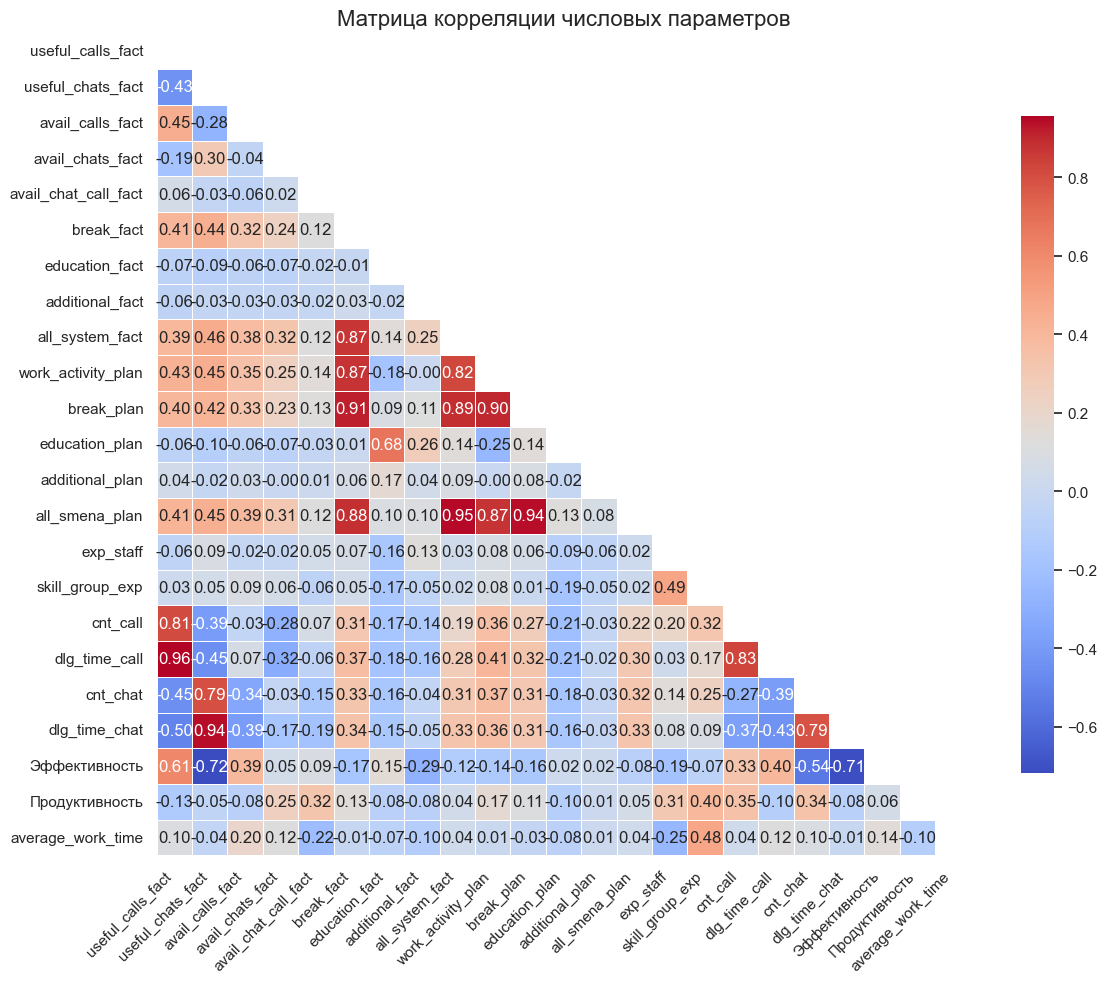

In [20]:
numeric_columns = data.select_dtypes(include=['number'])

# Вычисляем корреляционную матрицу
corr_matrix = numeric_columns.corr()

# Визуализация
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Маска для верхнего треугольника

# Используем heatmap из seaborn для лучшей визуализации
import seaborn as sns
sns.set_theme(style="white")
sns.heatmap(corr_matrix, 
            annot=True,  # Показывать значения
            fmt='.2f',   # Формат значений (2 знака после запятой)
            cmap='coolwarm',  # Цветовая схема
            mask=mask,   # Применяем маску для отображения только нижнего треугольника
            linewidths=0.5,  # Ширина линий между ячейками
            cbar_kws={"shrink": .8})  # Настройка цветовой шкалы

plt.title('Матрица корреляции числовых параметров', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()